In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats







In [2]:

# --- Scenario 1: Coin Flip Experiment (Testing for Fairness) ---

def plot_coin_flip_simulation(num_experiments=1000, num_flips_per_experiment=100, true_p_heads=0.5, h0_p_heads=0.5, alpha=0.05):
    """
    Simulates coin flip experiments and plots the distribution of observed head proportions.

    Illustrates:
    - Null Hypothesis (H0): The coin is fair (p_heads = h0_p_heads).
    - Alternative Hypothesis (Ha): The coin is not fair (p_heads != h0_p_heads).
    - Type I Error: Rejecting H0 when it's true. Visually, this would be observing a
      sample proportion in the "tails" of the distribution if H0 were true.
    - Type II Error: Failing to reject H0 when it's false (i.e., Ha is true).
      If true_p_heads is different from h0_p_heads, the distribution will be centered
      elsewhere, and we can see the overlap with the H0 acceptance region.
    """
    observed_proportions = []
    for _ in range(num_experiments):
        flips = np.random.rand(num_flips_per_experiment) < true_p_heads
        observed_proportions.append(np.mean(flips))

    plt.figure(figsize=(10, 6))
    plt.hist(observed_proportions, bins=30, density=True, alpha=0.7, label=f'Simulated Proportions (True p={true_p_heads})')

    # Distribution under H0
    # Using normal approximation for the sampling distribution of the proportion
    # Mean = p, SD = sqrt(p(1-p)/n)
    h0_sd = np.sqrt(h0_p_heads * (1 - h0_p_heads) / num_flips_per_experiment)
    x = np.linspace(h0_p_heads - 4*h0_sd, h0_p_heads + 4*h0_sd, 500)
    h0_dist = stats.norm.pdf(x, h0_p_heads, h0_sd)
    plt.plot(x, h0_dist, 'r--', label=f'Expected Dist. if H0 is True (p={h0_p_heads})')

    plt.axvline(h0_p_heads, color='red', linestyle='-', linewidth=2, label=f'H0: p = {h0_p_heads}')

    # Critical regions for Type I error if H0 is true
    # Two-tailed test
    lower_crit = stats.norm.ppf(alpha/2, loc=h0_p_heads, scale=h0_sd)
    upper_crit = stats.norm.ppf(1 - alpha/2, loc=h0_p_heads, scale=h0_sd)
    plt.axvline(lower_crit, color='orange', linestyle=':', linewidth=2, label=f'Lower Critical Value (alpha={alpha})')
    plt.axvline(upper_crit, color='orange', linestyle=':', linewidth=2, label=f'Upper Critical Value (alpha={alpha})')
    plt.fill_between(x, 0, h0_dist, where=(x <= lower_crit) | (x >= upper_crit), color='orange', alpha=0.3, label='Type I Error Region if H0 True')


    plt.title('Coin Flip Experiment Simulation')
    plt.xlabel('Proportion of Heads in Sample')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    print(f"""
    Scenario 1: Coin Flip Experiment
    H0: The coin is fair (p_heads = {h0_p_heads}).
    Ha: The coin is not fair (p_heads != {h0_p_heads}).
    This plot shows the distribution of sample proportions from {num_experiments} simulated experiments.
    - If the true probability of heads (true_p_heads) is {true_p_heads}, the histogram will be centered around this value.
    - The red dashed line shows the expected distribution if the Null Hypothesis (coin is fair at p={h0_p_heads}) were true.
    - The orange dotted lines mark critical values for a significance level of alpha={alpha}. If an observed proportion falls
      outside these lines, we might reject H0.
    - Type I Error (False Positive): If H0 is true (coin is fair) but our sample proportion by chance falls in the orange shaded regions,
      we would incorrectly reject H0. The area of these orange regions under the red H0 curve represents alpha.
    - Type II Error (False Negative): If H0 is false (e.g., true_p_heads = 0.6, but H0 assumes 0.5), but our sample proportion
      by chance falls within the critical values (between the orange lines), we would incorrectly fail to reject H0.
      This is more likely if the true effect is small or sample size is low.
    """)


In [3]:
# --- Scenario 2: Website A/B Test (Comparing Conversion Rates) ---

def plot_ab_test_simulation(mean_A=0.10, std_A=0.03, n_A=1000, mean_B=0.12, std_B=0.035, n_B=1000, alpha=0.05):
    """
    Simulates and plots the sampling distributions for conversion rates of two website designs.

    Illustrates:
    - Null Hypothesis (H0): New design B is not better than A (mean_B <= mean_A).
      For simplicity in visualization of errors, often visualized as mean_B = mean_A.
    - Alternative Hypothesis (Ha): New design B is better than A (mean_B > mean_A).
    - Type I Error: Concluding B is better when it's not (rejecting H0 when H0 is true).
    - Type II Error: Failing to conclude B is better when it actually is (failing to reject H0 when Ha is true).
    """
    # Sampling distributions (Normal approximation)
    # Assuming H0: mean_A = mean_B. For visualization, let's assume for H0 that mean_B_under_H0 = mean_A
    # And for Ha, mean_B_under_Ha = mean_B (the true mean_B if there is an effect)

    # Distribution of sample mean for A
    se_A = std_A / np.sqrt(n_A)
    # x_A = np.linspace(mean_A - 4*se_A, mean_A + 4*se_A, 500) # Not directly plotted, but used in difference
    # dist_A = stats.norm.pdf(x_A, mean_A, se_A)

    # Distribution of sample mean for B *IF H0 IS TRUE* (i.e., mean_B = mean_A)
    mean_B_h0 = mean_A
    se_B_h0 = std_B / np.sqrt(n_B) # Using actual std_B for spread, but mean_A for center under H0
    # x_B_h0 = np.linspace(mean_B_h0 - 4*se_B_h0, mean_B_h0 + 4*se_B_h0, 500) # Not directly plotted
    # dist_B_h0 = stats.norm.pdf(x_B_h0, mean_B_h0, se_B_h0)


    # Distribution of sample mean for B *IF Ha IS TRUE* (i.e., mean_B is its actual value, different from mean_A)
    se_B_ha = std_B / np.sqrt(n_B)
    # x_B_ha = np.linspace(mean_B - 4*se_B_ha, mean_B + 4*se_B_ha, 500) # Not directly plotted
    # dist_B_ha = stats.norm.pdf(x_B_ha, mean_B, se_B_ha)

    # For hypothesis testing, we look at the difference in means: D = mean_B - mean_A
    # H0: D_h0 = 0
    # Ha: D_ha = mean_B - mean_A
    mean_diff_h0 = 0
    std_diff_h0 = np.sqrt(se_A**2 + se_B_h0**2)

    mean_diff_ha = mean_B - mean_A
    std_diff_ha = np.sqrt(se_A**2 + se_B_ha**2)

    x_diff_min = min(mean_diff_h0 - 4*std_diff_h0, mean_diff_ha - 4*std_diff_ha)
    x_diff_max = max(mean_diff_h0 + 4*std_diff_h0, mean_diff_ha + 4*std_diff_ha)
    # Ensure x_diff_min is not excessively far if one distribution is very narrow or means are very close
    if mean_diff_ha == mean_diff_h0: # Handle case where H0 is true for plotting
        x_diff_min = mean_diff_h0 - 4*std_diff_h0
        x_diff_max = mean_diff_h0 + 4*std_diff_h0


    x_diff = np.linspace(x_diff_min, x_diff_max, 500)

    dist_diff_h0 = stats.norm.pdf(x_diff, mean_diff_h0, std_diff_h0)
    dist_diff_ha = stats.norm.pdf(x_diff, mean_diff_ha, std_diff_ha)


    plt.figure(figsize=(12, 7))
    plt.plot(x_diff, dist_diff_h0, label=f'Dist. of (Mean B - Mean A) if H0 is True (No Difference)', color='blue')
    plt.plot(x_diff, dist_diff_ha, label=f'Dist. of (Mean B - Mean A) if Ha is True (Actual Diff = {mean_diff_ha:.3f})', color='green', linestyle='--')

    # Critical value for one-tailed test
    critical_value = stats.norm.ppf(1 - alpha, loc=mean_diff_h0, scale=std_diff_h0)
    plt.axvline(critical_value, color='red', linestyle=':', linewidth=2, label=f'Critical Value (alpha={alpha})')

    # Type I Error region (alpha)
    plt.fill_between(x_diff, 0, dist_diff_h0, where=x_diff >= critical_value, color='red', alpha=0.2, label='Type I Error Region (alpha)')

    # Type II Error region (beta)
    # This is the area under the Ha curve to the left of the critical value
    if mean_diff_ha > mean_diff_h0 : # Only makes sense if Ha predicts a positive difference
        beta_area = stats.norm.cdf(critical_value, loc=mean_diff_ha, scale=std_diff_ha)
        plt.fill_between(x_diff, 0, dist_diff_ha, where=x_diff <= critical_value, color='purple', alpha=0.3, label=f'Type II Error Region (beta = {beta_area:.2f})')

    plt.title('A/B Test Simulation: Sampling Distributions of Difference in Means')
    plt.xlabel('Difference in Conversion Rates (Mean B - Mean A)')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.axvline(0, color='black', linestyle='-', linewidth=1, label='No difference line') # Centered line
    plt.show()

    print(f"""
    Scenario 2: Website A/B Test (Conversion Rates)
    H0: New design B is not better than A (mean_B - mean_A <= 0). (Simplified to mean_B - mean_A = 0 for visualization of H0 distribution)
    Ha: New design B is better than A (mean_B - mean_A > 0).
    This plot shows the sampling distributions of the *difference* in conversion rates between Design B and Design A.
    - The blue curve represents the distribution of differences if H0 is true (no real difference in means).
    - The green dashed curve represents the distribution of differences if Ha is true (Design B is truly better by {mean_B-mean_A:.3f}).
    - The red dotted line is the critical value. If our observed difference is to the right of this, we reject H0.
    - Type I Error (alpha, red shaded area): If H0 is true (no difference), this is the probability of observing a sample difference
      large enough to (wrongly) conclude B is better.
    - Type II Error (beta, purple shaded area): If Ha is true (B is actually better), this is the probability of observing a sample
      difference too small to detect the improvement, so we (wrongly) fail to reject H0.
      The power of the test is 1 - beta.
    """)


In [4]:
# --- Scenario 3: Drug Efficacy Test (Comparing Drug to Placebo) ---

def plot_drug_efficacy_simulation(n_drug=50, mean_effect_drug=0.5, std_drug=0.2,
                                  n_placebo=50, mean_effect_placebo=0.2, std_placebo=0.18,
                                  alpha=0.05):
    """
    Simulates outcomes for a drug group and a placebo group and plots them using box plots.

    Illustrates:
    - Null Hypothesis (H0): The drug has no effect compared to placebo (mean_drug <= mean_placebo).
      Simplified to mean_drug = mean_placebo for visualization.
    - Alternative Hypothesis (Ha): The drug has a positive effect (mean_drug > mean_placebo).
    - How sample variability can make it hard to distinguish true effects.
    - Visual intuition for comparing two groups.
    """
    drug_outcomes = np.random.normal(loc=mean_effect_drug, scale=std_drug, size=n_drug)
    placebo_outcomes = np.random.normal(loc=mean_effect_placebo, scale=std_placebo, size=n_placebo)

    data_to_plot = [placebo_outcomes, drug_outcomes]

    plt.figure(figsize=(8, 6))
    bp = plt.boxplot(data_to_plot, patch_artist=True, labels=['Placebo Group', 'Drug Group'])

    colors = ['lightblue', 'lightgreen']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

    # Add means to the plot
    plt.scatter([1, 2], [np.mean(placebo_outcomes), np.mean(drug_outcomes)], color=['blue', 'green'], marker='o', s=100, zorder=3, label='Sample Means')


    plt.title('Drug Efficacy Simulation: Outcomes by Group')
    plt.ylabel('Symptom Reduction Score (Higher is Better)')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.show()

    # For hypothesis testing with these samples:
    t_stat, p_value = stats.ttest_ind(drug_outcomes, placebo_outcomes, equal_var=False, alternative='greater') # Welch's t-test

    print(f"""
    Scenario 3: Drug Efficacy Test
    H0: The drug has no greater effect than placebo (mean_drug_effect <= mean_placebo_effect).
    Ha: The drug has a greater effect than placebo (mean_drug_effect > mean_placebo_effect).
    This plot shows box plots of simulated symptom reduction scores for a placebo group and a drug group.
    - Each box represents the distribution of outcomes for that group (median, quartiles, range).
    - The 'o' markers indicate the sample means.
    - Visual Overlap: If the boxes overlap significantly, it suggests that while the means might differ,
      it's harder to be certain the drug is truly better due to variability in patient responses.
    - Type I Error: If the drug actually has no added benefit (H0 is true), but due to random chance our samples
      show a large enough difference (e.g., p-value < {alpha} from a t-test), we'd incorrectly conclude the drug is effective.
      (Here, the actual t-test resulted in p-value={p_value:.3f})
    - Type II Error: If the drug is truly effective (Ha is true), but our samples don't show a statistically significant
      difference (e.g., p-value >= {alpha}), we'd fail to recognize its benefit. This is more likely with small
      sample sizes or small true effects.
    The box plots give an intuitive feel for the data before a formal test. A formal test (like a t-test) would
    quantify the evidence against H0. If p-value ({p_value:.3f}) < alpha ({alpha}), we would reject H0.
    """)



In [ ]:
# --- Generate the plots and explanations ---
# You would typically call these one at a time in an interactive environment
# or save them to files if running as a script.

# print("--- Running Scenario 1: Coin Flip ---")
# plot_coin_flip_simulation(true_p_heads=0.5) # Example where H0 is true
# plot_coin_flip_simulation(true_p_heads=0.6, h0_p_heads=0.5) # Example where H0 is false

# print("\n--- Running Scenario 2: A/B Test ---")
# plot_ab_test_simulation(mean_A=0.10, mean_B=0.10) # Example where H0 is true (no difference)
# plot_ab_test_simulation(mean_A=0.10, mean_B=0.13) # Example where H0 is false (B is better)

# print("\n--- Running Scenario 3: Drug Efficacy ---")
# plot_drug_efficacy_simulation(mean_effect_drug=0.25, mean_effect_placebo=0.20) # Example with a small true effect
# plot_drug_efficacy_simulation(mean_effect_drug=0.5, mean_effect_placebo=0.2) # Example with a larger true effect
# plot_drug_efficacy_simulation(mean_effect_drug=0.2, mean_effect_placebo=0.2) # Example where H0 is effectively true

# To make this runnable by the execution environment and provide one example output for the user,
# I will call one of the functions. Let's choose the first one with H0 being true.
# The user can then uncomment other calls to explore.




--- Visualizing Scenario 1: Coin Flip Experiment (H0 is True) ---


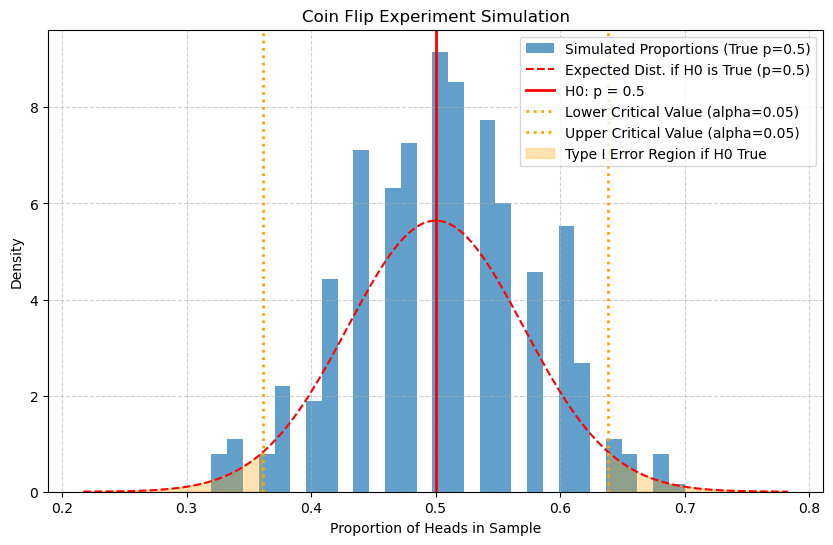


    Scenario 1: Coin Flip Experiment
    H0: The coin is fair (p_heads = 0.5).
    Ha: The coin is not fair (p_heads != 0.5).
    This plot shows the distribution of sample proportions from 500 simulated experiments.
    - If the true probability of heads (true_p_heads) is 0.5, the histogram will be centered around this value.
    - The red dashed line shows the expected distribution if the Null Hypothesis (coin is fair at p=0.5) were true.
    - The orange dotted lines mark critical values for a significance level of alpha=0.05. If an observed proportion falls
      outside these lines, we might reject H0.
    - Type I Error (False Positive): If H0 is true (coin is fair) but our sample proportion by chance falls in the orange shaded regions,
      we would incorrectly reject H0. The area of these orange regions under the red H0 curve represents alpha.
    - Type II Error (False Negative): If H0 is false (e.g., true_p_heads = 0.6, but H0 assumes 0.5), but our sample proportion
      b

In [7]:

print("--- Visualizing Scenario 1: Coin Flip Experiment (H0 is True) ---")
plot_coin_flip_simulation(true_p_heads=0.5, h0_p_heads=0.5, num_experiments=500, num_flips_per_experiment=50)




--- Visualizing Scenario 2: A/B Test (H0 is True, No real difference) ---


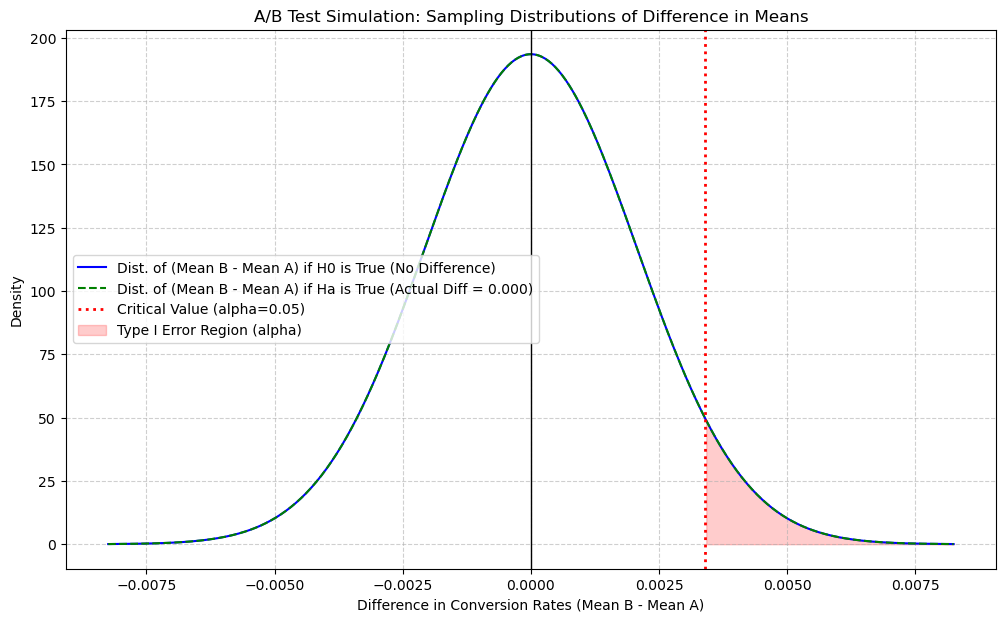


    Scenario 2: Website A/B Test (Conversion Rates)
    H0: New design B is not better than A (mean_B - mean_A <= 0). (Simplified to mean_B - mean_A = 0 for visualization of H0 distribution)
    Ha: New design B is better than A (mean_B - mean_A > 0).
    This plot shows the sampling distributions of the *difference* in conversion rates between Design B and Design A.
    - The blue curve represents the distribution of differences if H0 is true (no real difference in means).
    - The green dashed curve represents the distribution of differences if Ha is true (Design B is truly better by 0.000).
    - The red dotted line is the critical value. If our observed difference is to the right of this, we reject H0.
    - Type I Error (alpha, red shaded area): If H0 is true (no difference), this is the probability of observing a sample difference
      large enough to (wrongly) conclude B is better.
    - Type II Error (beta, purple shaded area): If Ha is true (B is actually better), this is t

In [6]:
print("\n--- Visualizing Scenario 2: A/B Test (H0 is True, No real difference) ---")
plot_ab_test_simulation(mean_A=0.10, mean_B=0.10, n_A=500, n_B=500) # H0 true


--- Visualizing Scenario 3: Drug Efficacy (Small true effect) ---


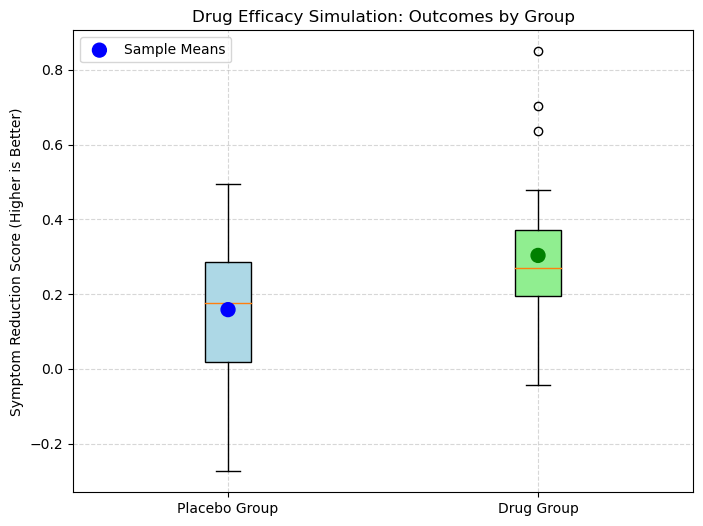


    Scenario 3: Drug Efficacy Test
    H0: The drug has no greater effect than placebo (mean_drug_effect <= mean_placebo_effect).
    Ha: The drug has a greater effect than placebo (mean_drug_effect > mean_placebo_effect).
    This plot shows box plots of simulated symptom reduction scores for a placebo group and a drug group.
    - Each box represents the distribution of outcomes for that group (median, quartiles, range).
    - The 'o' markers indicate the sample means.
    - Visual Overlap: If the boxes overlap significantly, it suggests that while the means might differ,
      it's harder to be certain the drug is truly better due to variability in patient responses.
    - Type I Error: If the drug actually has no added benefit (H0 is true), but due to random chance our samples
      show a large enough difference (e.g., p-value < 0.05 from a t-test), we'd incorrectly conclude the drug is effective.
      (Here, the actual t-test resulted in p-value=0.002)
    - Type II Error: If t

In [5]:
print("\n--- Visualizing Scenario 3: Drug Efficacy (Small true effect) ---")
plot_drug_efficacy_simulation(mean_effect_drug=0.25, mean_effect_placebo=0.20, n_drug=30, n_placebo=30)